In [14]:
import fastbook
fastbook.setup_book()

In [9]:
#hide
from fastbook import *
from fastai.vision.all import *

In [10]:
#hide
import os

directory_path = './data/images_original/'
directory_files = os.listdir(directory_path)

In [11]:
from PIL import Image

class CropTransform(Transform):
    def __init__(self, y_slice, x_slice):
        self.y_slice = y_slice
        self.x_slice = x_slice

    def encodes(self, img: Image.Image):
        cropped_img = img.crop((self.x_slice.start, self.y_slice.start, self.x_slice.stop, self.y_slice.stop))
        return cropped_img

In [13]:
%set_env PYTORCH_ENABLE_MPS_FALLBACK=1
%env
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")


genres = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(seed=8),
                   get_y=parent_label,
                   item_tfms=[CropTransform(y_slice=slice(35, 253), x_slice=slice(55, 390))],
                   batch_tfms=[*aug_transforms()]
                   )
dls = genres.dataloaders(directory_path)

env: PYTORCH_ENABLE_MPS_FALLBACK=1


{'COLORTERM': 'truecolor',
 'COMMAND_MODE': 'unix2003',
 'ELECTRON_NO_ATTACH_CONSOLE': '1',
 'GIT_ASKPASS': '/Applications/Visual Studio Code.app/Contents/Resources/app/extensions/git/dist/askpass.sh',
 'GOOGLE_APPLICATION_CREDENTIALS': '/Users/steven/Repos/FamilyProudCloud/serviceAccount.json',
 'HOME': '/Users/steven',
 'HOMEBREW_CELLAR': '/opt/homebrew/Cellar',
 'HOMEBREW_PREFIX': '/opt/homebrew',
 'HOMEBREW_REPOSITORY': '/opt/homebrew',
 'INFOPATH': '/opt/homebrew/share/info:',
 'JAVA_HOME': '/Applications/Android Studio.app/Contents/jre/Contents/Home',
 'LANG': 'en_US.UTF-8',
 'LOGNAME': 'steven',
 'MANPATH': '/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX.sdk/usr/share/man:/Applications/Xcode.app/Contents/Developer/Platforms/MacOSX.platform/usr/share/man:/Applications/Xcode.app/Contents/Developer/usr/share/man:/Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/share/man:/Users/steven/.nvm/versions/node/v1

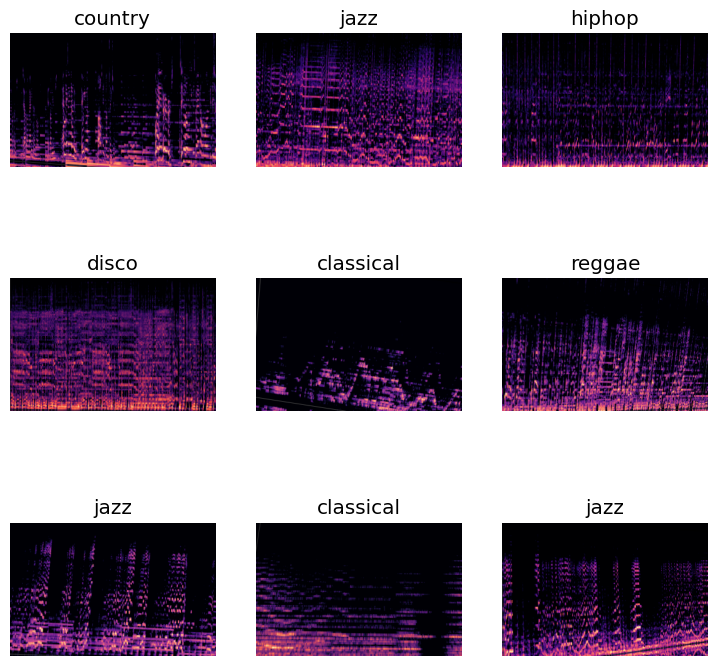

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet101, metrics=error_rate, pretrained=True)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
print(lr_steep)

0.005248074419796467


In [5]:
import math
start_lr = 1e-7  # Lower starting learning rate
end_lr = 0.01  # Wider range
num_steps = 50  # Fewer steps

scaling_factor = math.exp(math.log(end_lr / start_lr) / (num_steps - 1))
# optimizer = optim.SGD(net.parameters(), lr=start_lr, momentum=0.9)
lr_lambda = lambda step: (scaling_factor ** step)

math.log(end_lr / start_lr)/(num_steps - 1)

# for step in range(num_steps):
#   print(step)
#   print(lr_lambda(step))

0.23495766255041284

In [ ]:
# help(learn.fine_tune)
learn.fine_tune(epochs=20, base_lr=lr_steep)

epoch,train_loss,valid_loss,error_rate,time
0,2.735284,2.653326,0.653266,00:17


epoch,train_loss,valid_loss,error_rate,time
0,2.052141,1.726845,0.487437,00:23
1,1.871825,1.691691,0.467337,00:23
2,1.648314,1.614792,0.462312,00:22
3,1.452604,1.459002,0.386935,00:22
4,1.309770,1.532513,0.366834,00:22
5,1.172964,1.728902,0.396985,00:22
6,1.073151,1.540238,0.407035,00:22
7,0.997798,1.402934,0.346734,00:22
8,0.885448,1.326334,0.306533,00:22
9,0.794749,1.268034,0.306533,00:22


In [ ]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,2.948976,2.320880,0.678392,00:24


epoch,train_loss,valid_loss,error_rate,time
0,2.103143,2.022256,0.592965,00:22
1,1.933864,1.716348,0.507538,00:21
2,1.774777,1.594671,0.457286,00:21
3,1.665946,1.591042,0.477387,00:21
4,1.556962,1.651939,0.462312,00:22
5,1.480316,1.454181,0.417085,00:21
6,1.386299,1.532661,0.462312,00:22
7,1.284402,1.579012,0.432161,00:22
8,1.195235,1.511649,0.396985,00:22
9,1.099486,1.428894,0.402010,00:22


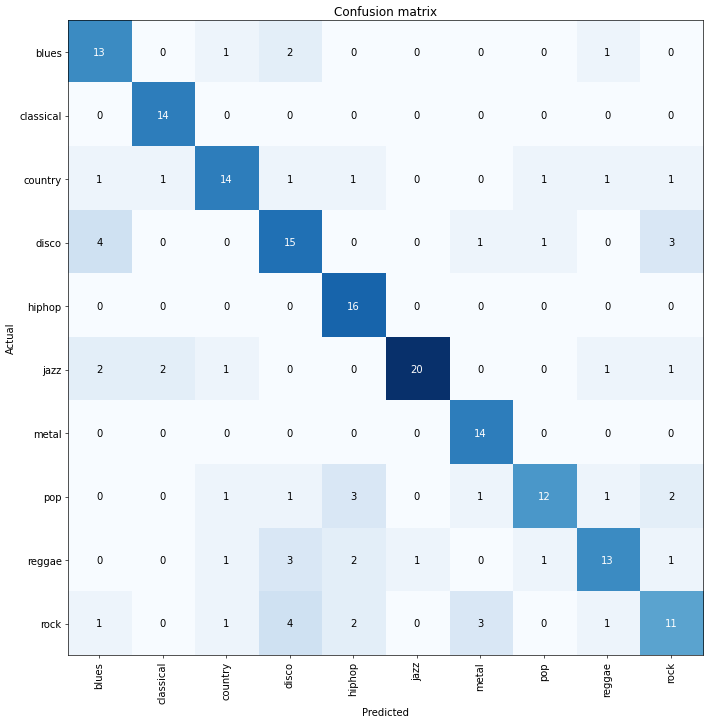

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# !pip install transformers
# !pip install datasets

# from transformers import AutoProcessor, ASTModel
# import torch
# from datasets import load_dataset

# dataset = load_dataset("/content/gdrive/MyDrive/297_298/genres_original", "clean", split="validation")
# dataset = dataset.sort("id")
# sampling_rate = dataset.features["audio"].sampling_rate

# processor = AutoProcessor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
# model = ASTModel.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

# # audio file is decoded on the fly
# inputs = processor(dataset[0]["audio"]["array"], sampling_rate=sampling_rate, return_tensors="pt")
# with torch.no_grad():
#     outputs = model(**inputs)

# last_hidden_states = outputs.last_hidden_state
# list(last_hidden_states.shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00


FileNotFoundError: ignored

In [ ]:
!pip install datasets
!pip install gradio
!pip install transformers
!pip install transformers[torch]
!pip install accelerate -U
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.2 MB/s eta

In [ ]:
from datasets import load_dataset

gtzan = load_dataset("marsyas/gtzan", "all")
gtzan = gtzan['train'].train_test_split(seed=10, shuffle=True, test_size=0.2)
gtzan

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 799
    })
    test: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 200
    })
})

In [ ]:
gtzan["train"][0]

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/disco/disco.00074.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/disco/disco.00074.wav',
  'array': array([ 0.01690674,  0.01544189,  0.01333618, ..., -0.13110352,
         -0.07781982,  0.00979614]),
  'sampling_rate': 22050},
 'genre': 3}

In [ ]:
id2label_fn = gtzan["train"].features["genre"].int2str
id2label_fn(gtzan["train"][0]["genre"])

'disco'

In [ ]:
import gradio as gr

def generate_audio():
    example = gtzan["train"].shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label_fn(example["genre"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:183: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [ ]:
from transformers import AutoFeatureExtractor
from datasets import Audio

model_id = "ntu-spml/distilhubert"
feature_extractor = AutoFeatureExtractor.from_pretrained(
    model_id, do_normalize=True, return_attention_mask=True
)
sampling_rate = feature_extractor.sampling_rate

# convert dataset sampling rate to sampling rate of model
gtzan = gtzan.cast_column("audio", Audio(sampling_rate=sampling_rate))
gtzan

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 799
    })
    test: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 200
    })
})

In [ ]:
import numpy as np

# pass data through feature extractor which will normalize data
# to mean 0 and var 1
max_duration = 30.0

def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=int(feature_extractor.sampling_rate * max_duration),
        truncation=True,
        return_attention_mask=True,
    )
    return inputs

gtzan_encoded = gtzan.map(
    preprocess_function,
    remove_columns=["audio", "file"],
    batched=True,
    batch_size=100,
    num_proc=1,
)
gtzan_encoded = gtzan_encoded.rename_column("genre", "label")

Map:   0%|          | 0/799 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
# convert numerical ids to labels
id2label = {
    str(i): id2label_fn(i)
    for i in range(len(gtzan_encoded["train"].features["label"].names))
}
label2id = {v: k for k, v in id2label.items()}

id2label["1"]

'classical'

In [ ]:
from transformers import AutoModelForAudioClassification

num_labels = len(id2label)

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['projector.bias', 'projector.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 10

training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=False,
)

In [ ]:
import evaluate
import numpy as np

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=gtzan_encoded["train"],
    eval_dataset=gtzan_encoded["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.906400,1.894014,0.500000
2,1.485300,1.338933,0.665000
3,0.954200,1.209887,0.630000
4,0.763600,1.098199,0.625000
5,0.525800,0.980973,0.665000
6,0.349600,0.817622,0.735000
7,0.347600,0.811703,0.745000
8,0.151300,0.802943,0.750000
9,0.111300,0.850715,0.740000
10,0.097900,0.803727,0.750000


TrainOutput(global_step=1000, training_loss=0.7614208969771862, metrics={'train_runtime': 6402.743, 'train_samples_per_second': 1.248, 'train_steps_per_second': 0.156, 'total_flos': 5.451675897024e+17, 'train_loss': 0.7614208969771862, 'epoch': 10.0})